<a href="https://colab.research.google.com/github/KimJunGu9/5.ML-DL/blob/main/5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 텐서플로우(TensorFlow)

* 텐서플로우는 ML모델을 개발하고 학습시키는데 도움이 되는 핵심 오픈 소스 라이브러리
* 텐서플로우 2.x에서는 케라스를 딥러닝 공식 API로 채택하였고, 텐서플로우 내의 하나의 프레임워크로 개발되고 있음

In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.11.0


### 1-1. Tensor
* Tensor는 multi-dimensional array를 나타내는 말
* Tensorflow의 기본 data type

In [ ]:
hello = tf.constant([3, 3], dtype=tf.float32) # 3,3짜리 리스트를 만들어서 상수를 만들겠다.  

# constant는 상수라는 뜻 -> 데이터를 변형할 수 없는 저장공간을 말함

print(hello) # shape=(2,) : 2행짜리 데이터, dtype=float32 : 소수점을 가짐

hello = tf.constant('Hello Tensor')
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)
tf.Tensor(b'Hello Tensor', shape=(), dtype=string)


In [ ]:
x = tf.constant([[1.0, 2.0], [3.0, 4.0]])
print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
x = tf.constant([[1.0], [2.0], [3.0], [4.0]])
print(x)
print(type(x))

tf.Tensor(
[[1.]
 [2.]
 [3.]
 [4.]], shape=(4, 1), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
import numpy as np

In [ ]:
x_np = np.array([[1.0, 2.0], 
                 [3.0, 4.0]])
x_list = [[1.0, 2.0], 
            [3.0, 4.0]]
    
print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [ ]:
# ndarray를 tensor로 변환    # tf.convert_to_tensor 사용

x_np_tf = tf.convert_to_tensor(x_np)


# list를 tensor로 변환   # tf.convert_to_tensor 사용
x_list_tf = tf.convert_to_tensor(x_list)

print(type(x_np_tf))
print(type(x_list_tf))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
# tensor를 numpy의 ndarray로 변환

print(x_np_tf.numpy())
print(type(x_np_tf.numpy()))

[[1. 2.]
 [3. 4.]]
<class 'numpy.ndarray'>


### 1-2. 텐서플로우 함수

In [ ]:
a = tf.ones((2, 3))
print(a)

print('-------')

b = tf.zeros(2, 3)
print(b)

print('-------')

c = tf.fill((2,3), 2)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
-------
tf.Tensor([0 0], shape=(2,), dtype=int32)
-------
tf.Tensor(
[[2 2 2]
 [2 2 2]], shape=(2, 3), dtype=int32)


In [ ]:
d = tf.zeros_like(c)   # c에 대한 shape랑 d 타입이 복사가 된다. # shape와 dtype만 복사(데이터는 복사하지 않음)
print(d)

e = tf.ones_like(c)
print(e)

tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[1 1 1]
 [1 1 1]], shape=(2, 3), dtype=int32)


In [ ]:
g = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [ ]:
h = tf.random.uniform((2, 2)) # 0 < 1의 랜덤함 값을 2행 2열로 추출  # uniform : 양수쪽만 데이터가 나옴
print(h)

i = tf.random.normal((2, 2))                                       # normal : 양수 뿐만아니라 음수도 나옴
print(i)

tf.Tensor(
[[0.4166714  0.7255293 ]
 [0.7265959  0.24187565]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.8529285   0.5726851 ]
 [-0.9612614   0.09551449]], shape=(2, 2), dtype=float32)


### 1-3. Tensor의 속성

In [ ]:
tensor = tf.random.normal((3, 4))
print(f'shape : {tensor.shape}')
print(f'Datatype : {tensor.dtype}')

shape : (3, 4)
Datatype : <dtype: 'float32'>


In [ ]:
tensor = tf.reshape(tensor, (4, 3))  # reshape : shape를 ( , )로 바꿔주는것
tensor = tf.cast(tensor, tf.int32)
print(f'shape : {tensor.shape}')
print(f'Datatype : {tensor.dtype}')

shape : (4, 3)
Datatype : <dtype: 'int32'>


### 1-4. Variable
* Variable은 변할 수 있는 상태를 저장하는데 사용되는 특별한 텐서 
* 딥러닝에서는 학습해야 하는 가중치(weight, bias)(기울기)들을 Variable로 생성


In [ ]:
tensor = tf.ones((3,4))
print(tensor)

# tensor[0,0] = 100  # TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

# 텐서에 있는 함수로 만들면 전부 constant로 만들기 때문에 수정할 수 없다.



tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


In [ ]:
# assign() : 값 설정
# assign_add() : 값 더하기
# assign_sub() : 값 빼기

var = tf.Variable(tensor)  # 데이터를 바꾸고싶으면 Variable로 바꿔주고
print(var)

var[0,0].assign(100) # 그 다음에 assign()함수를 이용해서 데이터를 넣어라
print(var)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[100.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.]], dtype=float32)>


In [ ]:
value1 = tf.random.normal(shape=(2, 2))
value1 = tf.Variable(value1)
print(value1)
value2 = tf.random.normal(shape=(2, 2))
print(value2)
value1.assign(value2)
print(value1)

value3 = tf.ones(shape=(2,2))
value1.assign_add(value3)
print(value1)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.7963745 , -0.50937843],
       [-1.2951556 ,  0.9157805 ]], dtype=float32)>
tf.Tensor(
[[-1.7437518  1.1711036]
 [-1.2387648 -2.2141495]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.7437518,  1.1711036],
       [-1.2387648, -2.2141495]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.74375176,  2.1711035 ],
       [-0.23876476, -1.2141495 ]], dtype=float32)>


### 1-5. indexing과 slicing

In [ ]:
a = tf.range(1, 13)
print(a)

a = tf.reshape(a, (3, 4)) # a를 가져다가 3행 4열로 만든다
print(a)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12], shape=(12,), dtype=int32)
tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [ ]:
# indexing을 하면 차원이 감소하게 됨
print(a[1])
print(a[0,-1])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [ ]:
# slicing은 차원이 유지됨
print(a[1:-1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


### 1-6. 차원 바꾸기

In [ ]:
a = tf.range(16)
print(a)
a = tf.reshape(a, (2, 2, -1))  # -1 은 자동으로 만들라는 뜻 # (2,2,4)랑 같음 # 2면 2행 4열
print(a)

tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], shape=(16,), dtype=int32)
tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [ ]:
# transpose : 행렬의 차원을 인덱스로 변환
b = tf.transpose(a, (2, 0, 1))
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


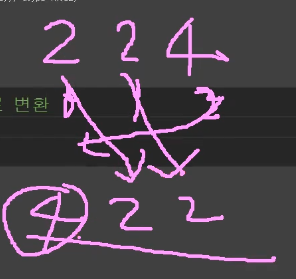

### 1-7. Tensor 연산

In [ ]:
x = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
y = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)
print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [ ]:
print(tf.add(x,y))
print(tf.subtract(x,y))
print(tf.multiply(x,y))
print(tf.divide(x,y))
print(tf.matmul(x,y))

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [ ]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [ ]:
z = tf.range(1, 11)
print(z)
z = tf.reshape(z, (2, 5))
print(z)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)
tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [ ]:
# reduce_sum() : 요소의 합계를 구함
print(tf.reduce_sum(z))



tf.Tensor(55, shape=(), dtype=int32)


In [ ]:
sum1 = tf.reduce_sum(z, axis= 0) # 행
print(sum1)

sum2 = tf.reduce_sum(z, axis = 1) # 열
print(sum2)

sum3 = tf.reduce_sum(z, axis=-1) # 열, 마지막방향
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


In [ ]:
# concat : 행과 열을 합쳐주는 함수

concat = tf.concat([z, z], axis = 0)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)


In [ ]:
concat = tf.concat([z, z], axis =1 )
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


In [ ]:
concat = tf.concat([z, z], axis = -1 )
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)
